# Experimentation and uplift testing

## Load data

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [189]:
cust_transact_data = pd.read_csv("./data/QVI_data.csv")
cust_transact_data.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [190]:
cust_transact_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   LYLTY_CARD_NBR    264834 non-null  int64  
 1   DATE              264834 non-null  object 
 2   STORE_NBR         264834 non-null  int64  
 3   TXN_ID            264834 non-null  int64  
 4   PROD_NBR          264834 non-null  int64  
 5   PROD_NAME         264834 non-null  object 
 6   PROD_QTY          264834 non-null  int64  
 7   TOT_SALES         264834 non-null  float64
 8   PACK_SIZE         264834 non-null  int64  
 9   BRAND             264834 non-null  object 
 10  LIFESTAGE         264834 non-null  object 
 11  PREMIUM_CUSTOMER  264834 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 24.2+ MB


## Changing to correct types

Converting `DATE` column to date type.

In [191]:
cust_transact_data["DATE"] = pd.to_datetime(cust_transact_data["DATE"])

Converting `PROD_NAME`, `BRAND`, `LIFESTAGE`, and `PREMIUM_CUSTOMER` to category type.

In [192]:
cust_transact_data["PROD_NAME"] = cust_transact_data["PROD_NAME"].astype("category")
cust_transact_data["BRAND"] = cust_transact_data["BRAND"].astype("category")
cust_transact_data["LIFESTAGE"] = cust_transact_data["LIFESTAGE"].astype("category")
cust_transact_data["PREMIUM_CUSTOMER"] = cust_transact_data["PREMIUM_CUSTOMER"].astype("category")

In [193]:
cust_transact_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  category      
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  category      
 10  LIFESTAGE         264834 non-null  category      
 11  PREMIUM_CUSTOMER  264834 non-null  category      
dtypes: category(4), datetime64[ns](1), float64(1), int64(6)
memory usage: 17.2 MB


## Removing stores which don't have 12 months data

In [194]:
cust_transact_data["MONTH"] = cust_transact_data["DATE"].dt.month
cust_transact_data["MONTH"]

0         10
1          9
2          3
3          3
4         11
          ..
264829    12
264830    10
264831    10
264832    10
264833    12
Name: MONTH, Length: 264834, dtype: int32

In [195]:
data_by_date = cust_transact_data.groupby("STORE_NBR")["MONTH"].nunique()

In [196]:
data_by_date

STORE_NBR
1      12
2      12
3      12
4      12
5      12
       ..
268    12
269    12
270    12
271    12
272    12
Name: MONTH, Length: 272, dtype: int64

In [197]:
stores_to_remove = data_by_date[data_by_date != 12].index

In [198]:
cust_transact_data = cust_transact_data[~cust_transact_data["STORE_NBR"].isin(stores_to_remove)]

## Splitting the data based on pre trial and trial period

### Pretrial data

In [199]:
cust_transact_data_pretrial = cust_transact_data[cust_transact_data["DATE"] < "2019-02-01"]

In [200]:
cust_transact_data_pretrial.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,10
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,9
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,11
5,1005,2018-12-28,1,6,86,Cheetos Puffs 165g,1,2.8,165,CHEETOS,MIDAGE SINGLES/COUPLES,Mainstream,12
6,1007,2018-12-04,1,7,49,Infuzions SourCream&Herbs Veg Strws 110g,1,3.8,110,INFUZIONS,YOUNG SINGLES/COUPLES,Budget,12


In [201]:
print("Min date: ", cust_transact_data_pretrial["DATE"].min())
print("Max date: ", cust_transact_data_pretrial["DATE"].max())

Min date:  2018-07-01 00:00:00
Max date:  2019-01-31 00:00:00


### Trial data

The trial date is between start of february to end of april.

In [202]:
cust_transact_data_trial = cust_transact_data[
    (cust_transact_data["DATE"] > "2019-02-01") &
    (cust_transact_data["DATE"] < "2019-05-01")
]

In [203]:
print("Min date: ", cust_transact_data_trial["DATE"].min())
print("Max date: ", cust_transact_data_trial["DATE"].max())

Min date:  2019-02-02 00:00:00
Max date:  2019-04-30 00:00:00


## Metrics for comparison

The following metrics will be used to select control stores similar to trial stores
* monthly total sales revenue
* monthly total number of customers
* monthly average number of transactions per customer

In [204]:
tot_sales = cust_transact_data_pretrial.groupby(["STORE_NBR","MONTH"])["TOT_SALES"].sum()

total_num_cust = (cust_transact_data_pretrial
                 .groupby(["STORE_NBR","MONTH"])["LYLTY_CARD_NBR"].nunique()
                 .rename("NUM_OF_CUST"))

avg_cust_transact = (cust_transact_data_pretrial
               .groupby(["STORE_NBR","MONTH"])["TOT_SALES"].mean()
               .rename("AVG_TRANSACT"))


cust_transact_summary = (pd.concat([tot_sales, total_num_cust, avg_cust_transact], axis=1))
                         

cust_transact_summary

TOT_SALES  NUM_OF_CUST  AVG_TRANSACT
STORE_NBR MONTH                                      
1         1         154.80           35      4.300000
          7         206.90           49      3.978846
          8         176.10           42      4.095349
          9         278.80           59      4.496774
          10        188.10           44      4.180000
...                    ...          ...           ...
272       8         372.85           44      7.767708
          9         304.70           32      8.463889
          10        430.60           44      8.443137
          11        376.20           41      8.360000
          12        403.90           47      8.593617

[1820 rows x 3 columns]

In [205]:
cust_transact_summary.loc[1]

,TOT_SALES,NUM_OF_CUST,AVG_TRANSACT
MONTH,,,
1,154.8,35,4.300000
7,206.9,49,3.978846
8,176.1,42,4.095349
9,278.8,59,4.496774
10,188.1,44,4.180000
11,192.6,46,4.097872
12,189.6,42,4.034043


## Function to get control store

In [206]:
def get_control_store(data, trial_store):
    data = data.copy()
    data = data.sort_values(["STORE_NBR", "MONTH"], ascending=False)
    
    corr_scores = pd.DataFrame(columns=["STORE_NBR", "TOT_SALES", "NUM_OF_CUST", "AVG_TRANSACT"])
    
    stores = cust_transact_summary.index.get_level_values(0).unique().to_list()
    
    for i in stores:
        store = pd.Series([i])
        store.index = ["STORE_NBR"]
        corr_score_i = pd.concat(
            [store,
            cust_transact_summary.loc[trial_store].corrwith(cust_transact_summary.loc[i])]
        )
        corr_scores = pd.concat(
            [corr_scores,
             pd.DataFrame([corr_score_i.to_list()], columns=corr_score_i.index)],
            ignore_index=True
        )
     
    corr_scores["STORE_NBR"] = corr_scores["STORE_NBR"].astype(np.int32)
    corr_scores = corr_scores[~(corr_scores["STORE_NBR"] == trial_store)]
    
    corr_scores["MEAN_SCORE"] = corr_scores[["TOT_SALES", "NUM_OF_CUST", "AVG_TRANSACT"]].mean(axis=1)
    corr_scores = corr_scores.sort_values("MEAN_SCORE", ascending=False)
    return corr_scores.iloc[0]["STORE_NBR"], corr_scores
    

## Utilities

In [207]:
# function to calculate ttest

from scipy.stats import ttest_ind, t
def get_ttest(data, store, control_store):
    ttest_scores = []
    metrics = ["TOT_SALES_MONTHLY", "AVG_CUST_SPEND", "NUM_OF_CUST"]
    for col in metrics:
        ttest_scores.append(
            ttest_ind(data.loc[store, col], data.loc[control_store, col])
        )
    ttest_scores = pd.DataFrame(ttest_scores, index=metrics)
    return ttest_scores

In [208]:
# function to calculate ks test

from scipy.stats import ks_2samp
def get_kstest(data, store, control_store):
    kstest_scores = []
    metrics = ["TOT_SALES_MONTHLY", "AVG_CUST_SPEND", "NUM_OF_CUST"]
    for col in metrics:
        kstest_scores.append(
            ks_2samp(data.loc[store, col], data.loc[control_store, col])
        )
    kstest_scores = pd.DataFrame(kstest_scores, index=metrics)
    return kstest_scores

### Ploting utilities

In [209]:
# def bar_plots(data_series, x_label, y_label, title):
#     fig, ax = plt.subplots()
#     ax = data_series.plot.bar()
#     ax.set_ylabel(y_label)
#     ax.set_title(title)
#     ax.set_xticklabels(x_label, rotation=45, ha='right')

In [210]:
import seaborn as sns

def plot_hist(data_series, store, control_store, title):
    fig, ax = plt.subplots()
    sns.histplot(data_series.loc[store], color = 'r', ax = ax, kde=True, linewidth=0)
    sns.histplot(data_series.loc[control_store], color = 'g', ax = ax, kde=True, linewidth=0)
    plt.legend(labels = [store, control_store])
    ax.set_title(title)
    plt.show()

In [211]:
def plot_bar(data_series, store, control_store, ylabel, title):
    fig, ax = plt.subplots()
    data_series.loc[store].plot(kind = 'bar', color = 'g')
    data_series.loc[control_store].plot(kind = 'bar', color = 'r', alpha = 0.5)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    plt.legend(labels = (store, control_store))

In [212]:
def plot_distribution(data, store, control_store):
    metrics = ["TOT_SALES_MONTHLY", "AVG_CUST_SPEND", "NUM_OF_CUST"]
    title = [
        "Total Monthly Sales", 
        "Average Customer Spending",
        "Number of Customers"
    ]
    ylabel = [
        "Monthly Sales",
        "Average Customer Spending",
        "Number of Customers"
    ]
    for i, col in enumerate(metrics):
        plot_hist(data.loc[:, col], store, control_store, title[i])
        plot_bar(data.loc[:, col], store, control_store, ylabel[i], title[i])

## Evaluation of trial store 77

Get the control store similar to store 77.

In [213]:
store_77 = 77

In [214]:
control_store_77, store_77_corr_score = get_control_store(cust_transact_summary, store_77)

In [215]:
control_store_77

233.0

So store 233 is similar to sotre 77, so the control store is 233 for store 77.

### Similarity between store 77 and 233

In [216]:
data_77_233_pretrial = (cust_transact_data_pretrial.groupby(["STORE_NBR", "MONTH"]).agg(
    
        TOT_SALES_MONTHLY=("TOT_SALES", "sum"),
        AVG_CUST_SPEND=("TOT_SALES", "mean"),
        NUM_OF_CUST=("LYLTY_CARD_NBR", "nunique")
    
    )
     .loc[[77, 233]]
    )

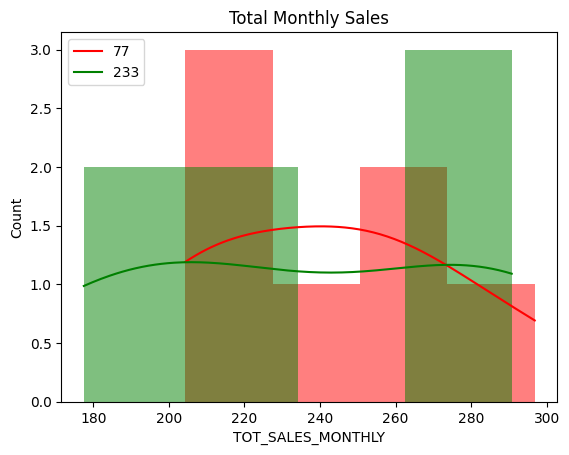

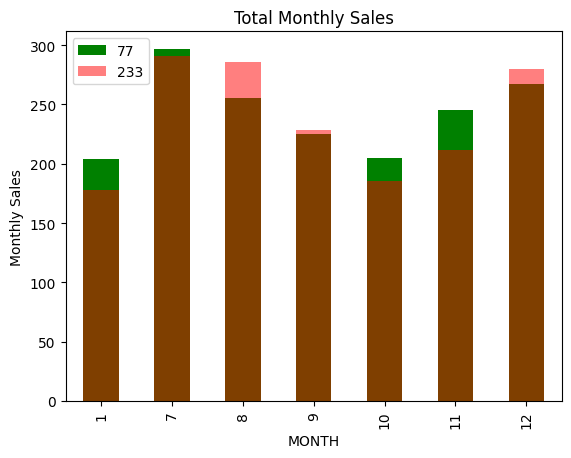

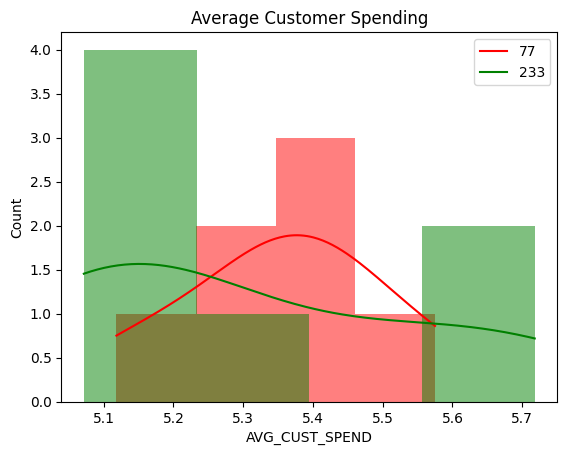

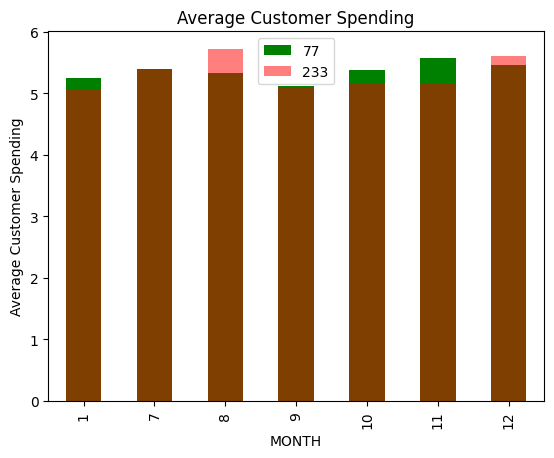

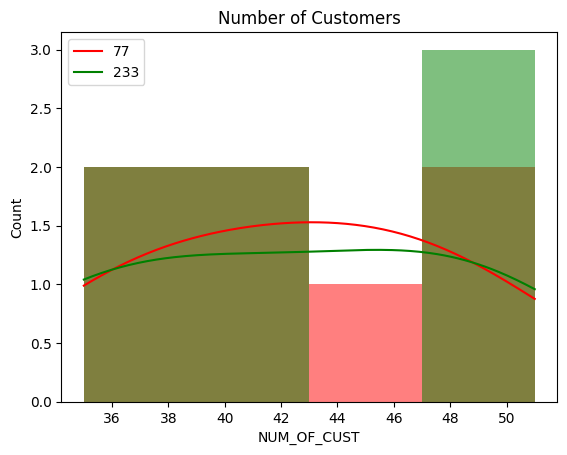

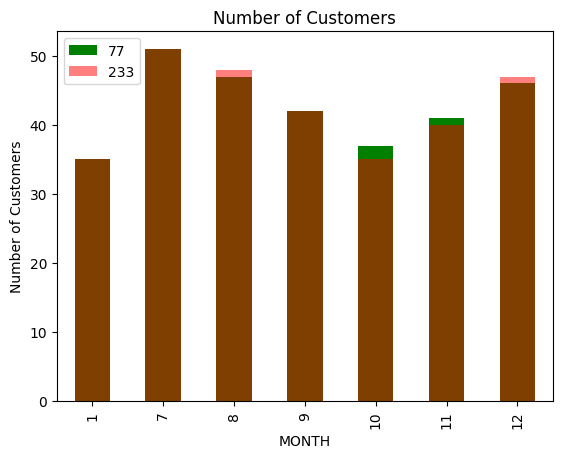

In [217]:
plot_distribution(data_77_233_pretrial, 77, 233)

distributions of both stores lool similar. Let's do Kolmogorov–Smirnov test.

#### Kolmogorov–Smirnov test to measure similarity of two datasets.

Let the null hypothesis be that both store 77 and store 233 are similar. To reject null hypothesis we need pvalue less than 0.05.

In [218]:
get_kstest(data_77_233_pretrial, 77, 233)

C:\Users\naveen\AppData\Local\Temp\ipykernel_48868\236443750.py:9: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_2samp(data.loc[store, col], data.loc[control_store, col])


,statistic,pvalue
TOT_SALES_MONTHLY,0.285714,0.962704
AVG_CUST_SPEND,0.428571,0.575175
NUM_OF_CUST,0.142857,0.999961


Since pvalue is greater than 0.05 (5%) we can't reject the null hypothesis. So both the distributions are similar.

### Impact of trial - store 77

We'll use ttest to check if there is any significant difference between trial store and control store.

In [219]:
data_77_233_trial = (cust_transact_data_trial.groupby(["STORE_NBR", "MONTH"]).agg(
    
        TOT_SALES_MONTHLY=("TOT_SALES", "sum"),
        AVG_CUST_SPEND=("TOT_SALES", "mean"),
        NUM_OF_CUST=("LYLTY_CARD_NBR", "nunique")
    
    )
     .loc[[77, 233]]
    )

In [220]:
data_77_233_trial

TOT_SALES_MONTHLY  AVG_CUST_SPEND  NUM_OF_CUST
STORE_NBR MONTH                                                
77        2                  224.0        5.209302           43
          3                  278.5        5.063636           50
          4                  263.5        5.489583           47
233       2                  233.6        5.191111           43
          3                  199.1        4.856098           40
          4                  158.6        4.806061           30

Perform the ttest.

In [221]:
get_ttest(data_77_233_trial, 77, 233)

,statistic,pvalue
TOT_SALES_MONTHLY,2.149513,0.098035
AVG_CUST_SPEND,1.743079,0.156275
NUM_OF_CUST,2.035202,0.111551


In [222]:
# critical val
t.ppf(0.95, 5)

2.015048372669157

pvalues are greater than 5% so we reject the hypothesis.
t-values are larger than 95th percentile value hence there is significant increase in sales in trial store as compared to control stores.

**Store 77 performed significantly better than control store 233 in the trial period.**

## Evaluation of trial store 86

Get the control store similar to store 86.

In [223]:
store_86 = 86

In [224]:
control_store_86, store_86_corr_score = get_control_store(cust_transact_summary, store_86)

In [225]:
control_store_86 = int(control_store_86)
control_store_86

155

### Similarity between store 86 and 155

In [226]:
data_86_155_pretrial = (cust_transact_data_pretrial.groupby(["STORE_NBR", "MONTH"]).agg(
    
        TOT_SALES_MONTHLY=("TOT_SALES", "sum"),
        AVG_CUST_SPEND=("TOT_SALES", "mean"),
        NUM_OF_CUST=("LYLTY_CARD_NBR", "nunique")
    
    )
     .loc[[86, 155]]
    )

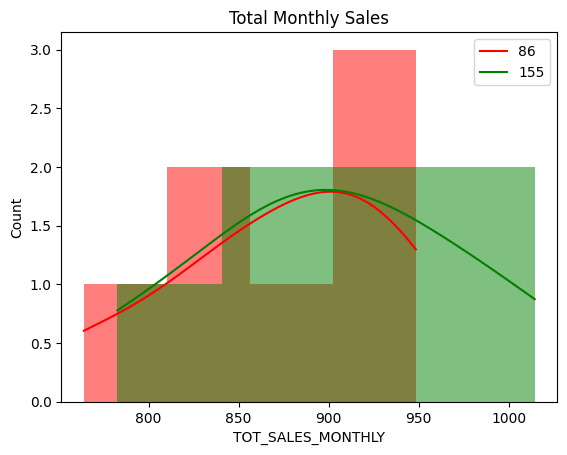

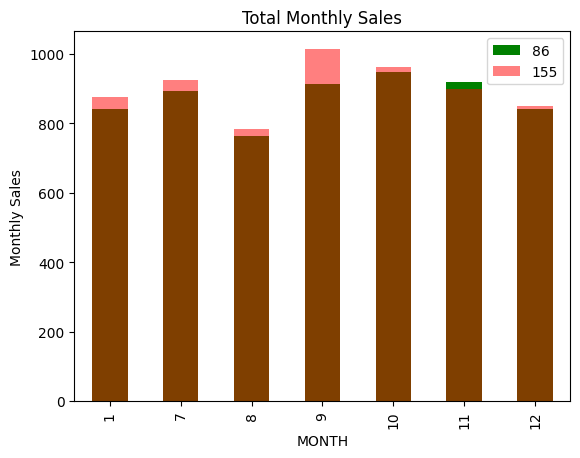

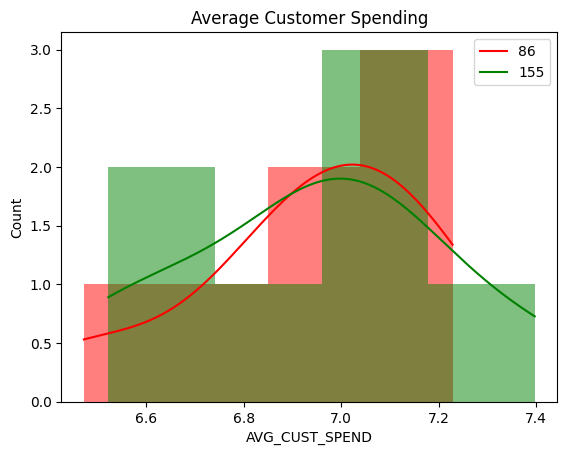

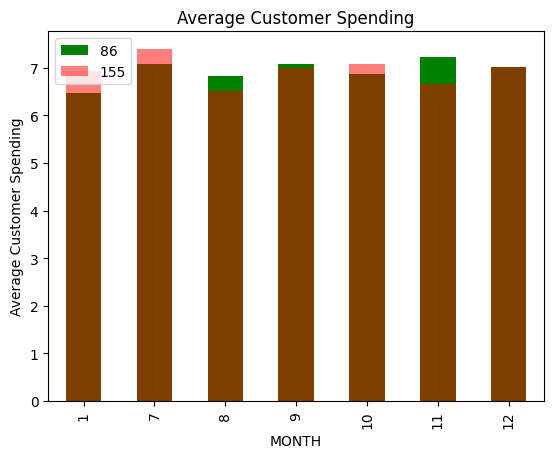

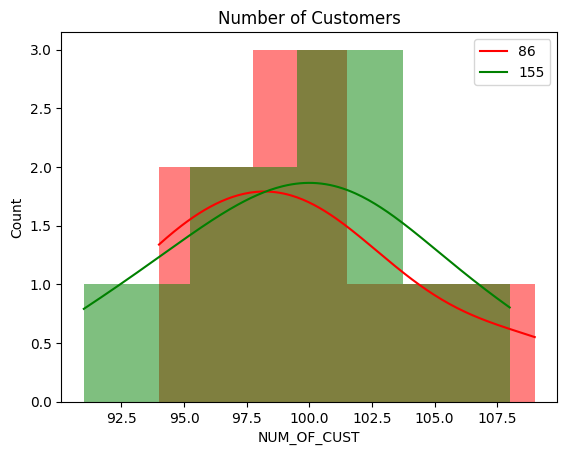

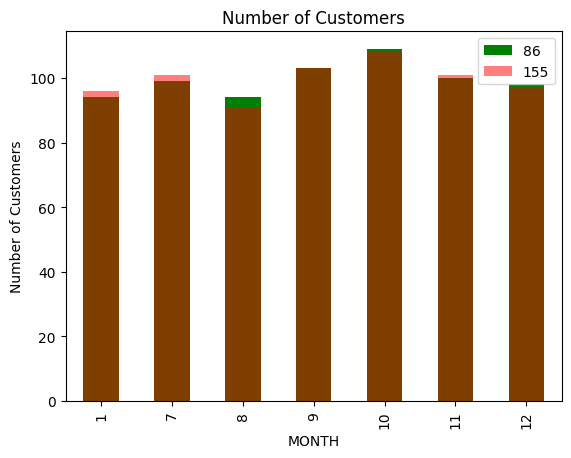

In [227]:
plot_distribution(data_86_155_pretrial, 86, 155)

distributions of both stores lool similar. Let's do Kolmogorov–Smirnov test.

#### Kolmogorov–Smirnov test to measure similarity of store 86 and 155.

Let the null hypothesis be that store 86 and store 155 are similar.

In [228]:
get_kstest(data_86_155_pretrial, 86, 155)

C:\Users\naveen\AppData\Local\Temp\ipykernel_48868\236443750.py:9: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_2samp(data.loc[store, col], data.loc[control_store, col])


,statistic,pvalue
TOT_SALES_MONTHLY,0.285714,0.962704
AVG_CUST_SPEND,0.142857,0.999961
NUM_OF_CUST,0.285714,0.962704


pvalues are greater than 0.05 and D values are close to 0 so we can't reject null hypothesis. Both store are similar in pretrial period.

### Impact of trial - store 86

We'll use t-test to check if there is any significant difference between trial store and control store.

In [229]:
data_86_155_trial = (cust_transact_data_trial.groupby(["STORE_NBR", "MONTH"]).agg(
    
        TOT_SALES_MONTHLY=("TOT_SALES", "sum"),
        AVG_CUST_SPEND=("TOT_SALES", "mean"),
        NUM_OF_CUST=("LYLTY_CARD_NBR", "nunique")
    
    )
     .loc[[86, 155]]
    )
data_86_155_trial

TOT_SALES_MONTHLY  AVG_CUST_SPEND  NUM_OF_CUST
STORE_NBR MONTH                                                
86        2                  894.6        6.577941          104
          3                 1026.8        7.230986          115
          4                  848.2        6.678740          105
155       2                  874.6        7.053226           92
          3                  804.4        6.703333           94
          4                  844.6        6.980165           99

Perform ttest.

In [230]:
get_ttest(data_86_155_trial, 86, 155)

,statistic,pvalue
TOT_SALES_MONTHLY,1.432609,0.225247
AVG_CUST_SPEND,-0.362133,0.735574
NUM_OF_CUST,3.184337,0.033396


In [231]:
# critical val
t.ppf(0.95, 5)

2.015048372669157

Although there is increase in total monthly sales but t-value is less than critical value for 95% confidence interval. Number of customers have increased significantly but the p-value corresponding to t-value is less than 0.05. Average customer spending is decreased but not significantly. So there is no significant difference between store 86 and store 155.

**The statistical evidence shows that performance of store 86 is not significantly different than store 155**

## Evaluation of trial store 88

Get the control store similar to store 88.

In [233]:
store_88 = 88

In [234]:
control_store_88, store_88_corr_score = get_control_store(cust_transact_summary, 88)

In [240]:
control_store_candidate = store_88_corr_score.head(15)["STORE_NBR"].values

In [241]:
control_store_candidate

array([ 69, 178, 204, 187, 113, 201, 134,  14, 248, 257, 237, 119, 203,
        26,  91])

### Store similar to store 88

In [ ]:
data_88_69_pretrial = (cust_transact_data_pretrial.groupby(["STORE_NBR", "MONTH"]).agg(
    
        TOT_SALES_MONTHLY=("TOT_SALES", "sum"),
        AVG_CUST_SPEND=("TOT_SALES", "mean"),
        NUM_OF_CUST=("LYLTY_CARD_NBR", "nunique")
    
    )
     .loc[[88, 69]]
    )


In [ ]:
plot_distribution(data_88_69_pretrial, 88, 69)


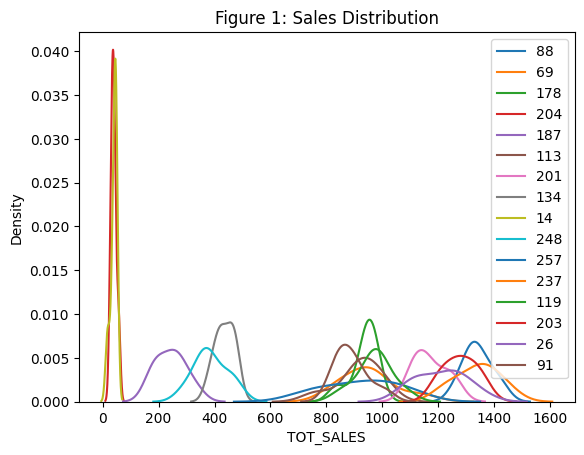

In [260]:
fig, ax = plt.subplots()

ax.set_title("Figure 1: Sales Distribution")

sns.kdeplot(cust_transact_summary.loc[88]['TOT_SALES'],label="88", ax=ax)

for x in control_store_candidate:
    sns.kdeplot(cust_transact_summary.loc[x]['TOT_SALES'],label=x, ax=ax)
plt.legend()

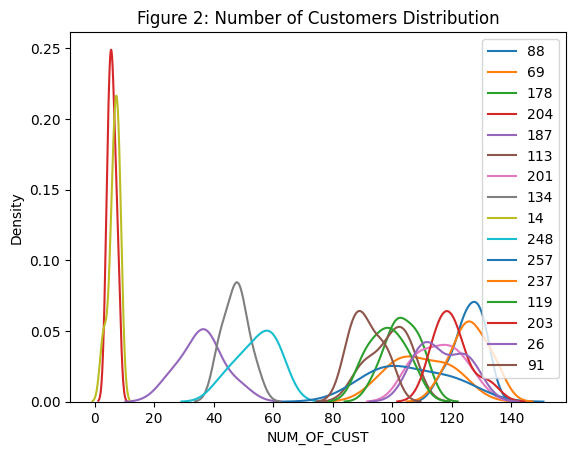

In [261]:
fig, ax = plt.subplots()

ax.set_title("Figure 2: Number of Customers Distribution")

sns.kdeplot(cust_transact_summary.loc[88]['NUM_OF_CUST'],label="88", ax=ax)

for x in control_store_candidate:
    sns.kdeplot(cust_transact_summary.loc[x]['NUM_OF_CUST'],label=x, ax=ax)
plt.legend()

From figure 1 and figure 2 we can conclude that store 88 is similar to store 237.

### Similarity of store 88 and store 237

In [262]:
data_88_237_pretrial = (cust_transact_data_pretrial.groupby(["STORE_NBR", "MONTH"]).agg(
    
        TOT_SALES_MONTHLY=("TOT_SALES", "sum"),
        AVG_CUST_SPEND=("TOT_SALES", "mean"),
        NUM_OF_CUST=("LYLTY_CARD_NBR", "nunique")
    
    )
     .loc[[88, 237]]
    )

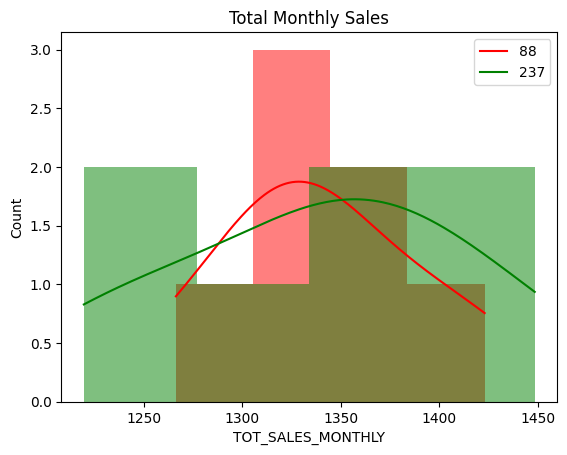

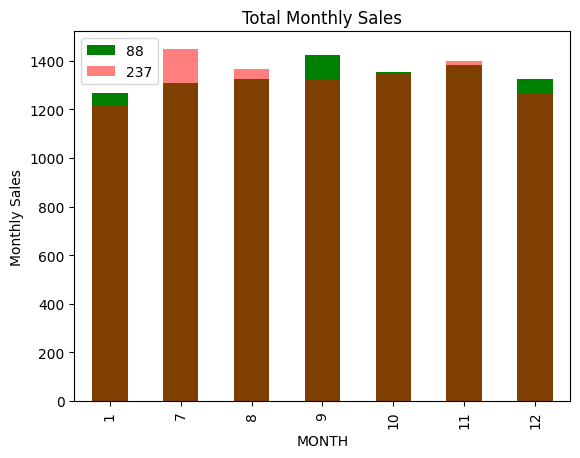

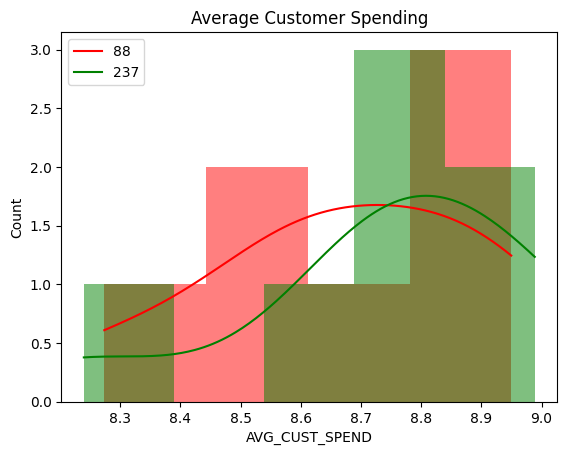

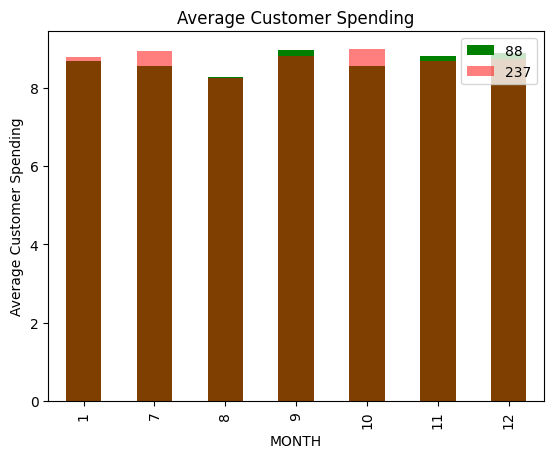

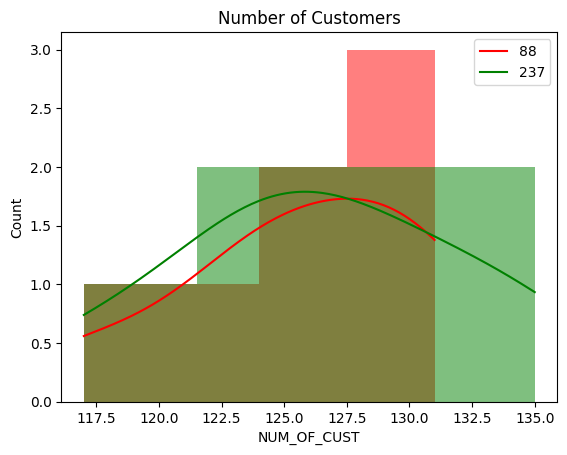

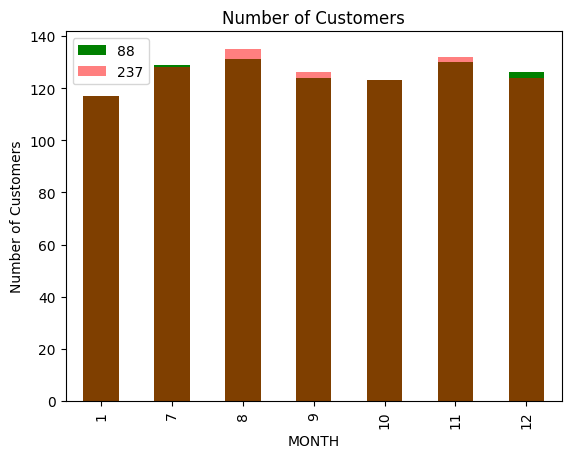

In [263]:
plot_distribution(data_88_237_pretrial, 88, 237)

#### Kolmogorov–Smirnov test to measure similarity of store 88 and 237.

Let the null hypothesis be that store 88 and store 237 are similar.

In [265]:
get_kstest(data_86_155_pretrial, 86, 155)

C:\Users\naveen\AppData\Local\Temp\ipykernel_48868\236443750.py:9: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  ks_2samp(data.loc[store, col], data.loc[control_store, col])


,statistic,pvalue
TOT_SALES_MONTHLY,0.285714,0.962704
AVG_CUST_SPEND,0.142857,0.999961
NUM_OF_CUST,0.285714,0.962704


p values are greater than 0.05 and D values are closer to 0 so we can't reject null hypothesis. From the distribution plots and ks test we can conclude that both store 88 and 237 are similar in pretrial.

### Impact of trial - store 88

Perform t-test

In [268]:
data_88_237_trial = (cust_transact_data_trial.groupby(["STORE_NBR", "MONTH"]).agg(
    
        TOT_SALES_MONTHLY=("TOT_SALES", "sum"),
        AVG_CUST_SPEND=("TOT_SALES", "mean"),
        NUM_OF_CUST=("LYLTY_CARD_NBR", "nunique")
    
    )
     .loc[[88, 237]]
    )
data_88_237_trial

TOT_SALES_MONTHLY  AVG_CUST_SPEND  NUM_OF_CUST
STORE_NBR MONTH                                                
88        2                 1316.2        8.893243          121
          3                 1477.2        8.689412          134
          4                 1439.4        8.885185          128
237       2                 1374.4        8.924675          124
          3                 1208.2        8.818978          119
          4                 1204.6        8.857353          120

In [269]:
get_ttest(data_88_237_trial, 88, 237)

,statistic,pvalue
TOT_SALES_MONTHLY,2.002868,0.115737
AVG_CUST_SPEND,-0.604314,0.578236
NUM_OF_CUST,1.643990,0.175523


In [278]:
# critical val
t.ppf(0.95, 5)

2.015048372669157

So the t value is close to the critical value with p value greater than 0.05 (5%). Hence there is significant increase in sales. Number of customers have increase but not significantly.

**There is significant increase in sales in store 88 as compared to control store. There is also increase in customers but not significantly.**

## Conclusion

* Significant increase in sales and customers in store 77 during the trial period
* Store 86 didn't show a significant increase in sales and customers compared to the control store.
* There was a significant increase in sales in store 88 during the trial period. The number of customers also increase but not significantly.